In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [52]:
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv("./Datasets/Stock_Prices (1).csv")

In [54]:
df.head()

,Date,ClosingPrice,HighPrice,LowPrice,Volume,MarketIndex
0,2020-01-01,101.764052,102.877908,97.502907,54529,499.868247
1,2020-01-02,102.164210,104.973498,100.482640,24590,500.461453
2,2020-01-03,103.142948,107.744892,98.602801,54406,501.596404
3,2020-01-04,105.383841,106.555576,101.130727,62652,499.305580
4,2020-01-05,107.251399,107.805419,103.756775,32728,500.186152


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1096 non-null   object 
 1   ClosingPrice  1096 non-null   float64
 2   HighPrice     1096 non-null   float64
 3   LowPrice      1096 non-null   float64
 4   Volume        1096 non-null   int64  
 5   MarketIndex   1096 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 51.5+ KB


In [56]:
df.describe()

,ClosingPrice,HighPrice,LowPrice,Volume,MarketIndex
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,76.986119,79.506866,74.445358,54471.208942,506.798963
std,26.384561,26.476108,26.402910,25977.276871,12.355941
min,33.409210,33.946333,30.392513,10043.000000,476.792443
25%,53.171683,55.652614,50.447154,31775.000000,498.777958
50%,79.209064,81.584062,76.668422,53931.500000,508.635358
75%,102.668005,105.469427,100.222509,77319.000000,515.846279
max,120.585036,124.692568,119.554514,99974.000000,530.677327


In [57]:
df.isnull().sum()

Date            0
ClosingPrice    0
HighPrice       0
LowPrice        0
Volume          0
MarketIndex     0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [59]:
df["Date"]=pd.to_datetime(df["Date"])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1096 non-null   datetime64[ns]
 1   ClosingPrice  1096 non-null   float64       
 2   HighPrice     1096 non-null   float64       
 3   LowPrice      1096 non-null   float64       
 4   Volume        1096 non-null   int64         
 5   MarketIndex   1096 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 51.5 KB


In [61]:
df.head()

,Date,ClosingPrice,HighPrice,LowPrice,Volume,MarketIndex
0,2020-01-01,101.764052,102.877908,97.502907,54529,499.868247
1,2020-01-02,102.164210,104.973498,100.482640,24590,500.461453
2,2020-01-03,103.142948,107.744892,98.602801,54406,501.596404
3,2020-01-04,105.383841,106.555576,101.130727,62652,499.305580
4,2020-01-05,107.251399,107.805419,103.756775,32728,500.186152


In [62]:
df.set_index("Date" , inplace=True)
df.head()

,ClosingPrice,HighPrice,LowPrice,Volume,MarketIndex
Date,,,,,
2020-01-01,101.764052,102.877908,97.502907,54529,499.868247
2020-01-02,102.164210,104.973498,100.482640,24590,500.461453
2020-01-03,103.142948,107.744892,98.602801,54406,501.596404
2020-01-04,105.383841,106.555576,101.130727,62652,499.305580
2020-01-05,107.251399,107.805419,103.756775,32728,500.186152


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2020-01-01 to 2022-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ClosingPrice  1096 non-null   float64
 1   HighPrice     1096 non-null   float64
 2   LowPrice      1096 non-null   float64
 3   Volume        1096 non-null   int64  
 4   MarketIndex   1096 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 51.4 KB


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

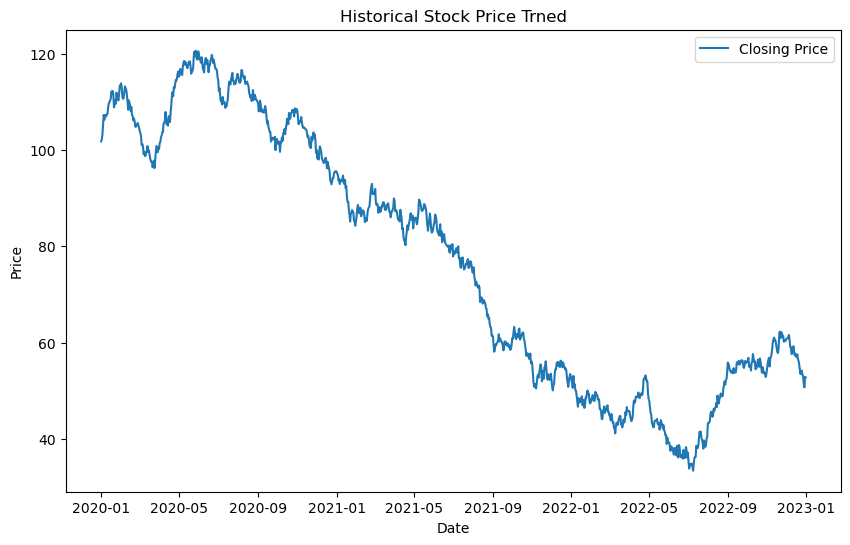

In [65]:
plt.figure(figsize=(10,6))
plt.plot(df.index , df["ClosingPrice"] , label="Closing Price")
plt.title("Historical Stock Price Trned")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.legend()
plt.show()

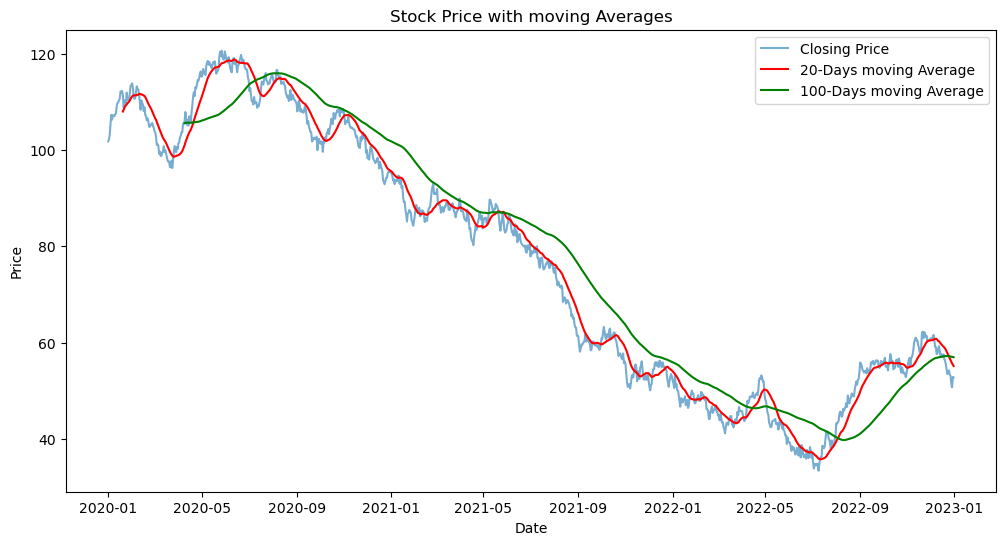

In [66]:
df["20_m"]=df["ClosingPrice"].rolling(window=20).mean()
df["100_m"]=df["ClosingPrice"].rolling(window=100).mean()
plt.figure(figsize=(12,6))
plt.plot(df.index , df["ClosingPrice"] , label="Closing Price ", alpha=0.6)
plt.plot(df.index , df["20_m"] , label="20-Days moving Average" , color="red")
plt.plot(df.index , df["100_m"] , label="100-Days moving Average" , color="green")
plt.title("Stock Price with moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

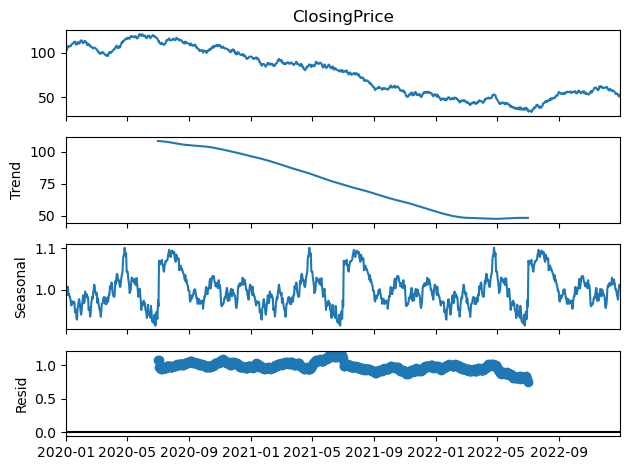

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(df["ClosingPrice"] , model="multiplicative" , period=365)
decomposition.plot()
plt.show()

In [68]:
correlation_matrix=df.corr()
correlation_matrix

,ClosingPrice,HighPrice,LowPrice,Volume,MarketIndex,20_m,100_m
ClosingPrice,1.000000,0.998479,0.998508,-0.001785,-0.607755,0.995584,0.970235
HighPrice,0.998479,1.000000,0.996928,-0.003164,-0.605646,0.994211,0.968763
LowPrice,0.998508,0.996928,1.000000,-0.004259,-0.606935,0.993773,0.968434
Volume,-0.001785,-0.003164,-0.004259,1.000000,-0.071783,0.005154,0.031774
MarketIndex,-0.607755,-0.605646,-0.606935,-0.071783,1.000000,-0.607783,-0.645068
20_m,0.995584,0.994211,0.993773,0.005154,-0.607783,1.000000,0.980168
100_m,0.970235,0.968763,0.968434,0.031774,-0.645068,0.980168,1.000000


Text(0.5, 1.0, 'Correlation Matrix of Stock Price')

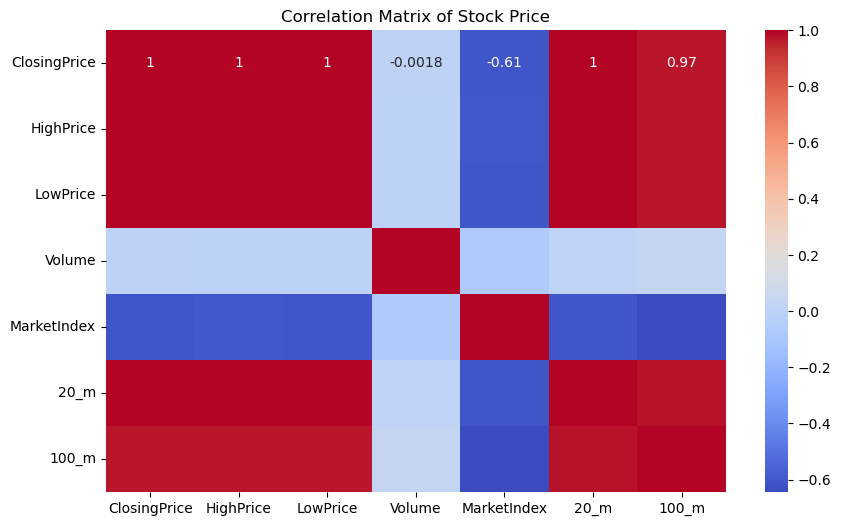

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix , annot=True , cmap="coolwarm" )
plt.title("Correlation Matrix of Stock Price")

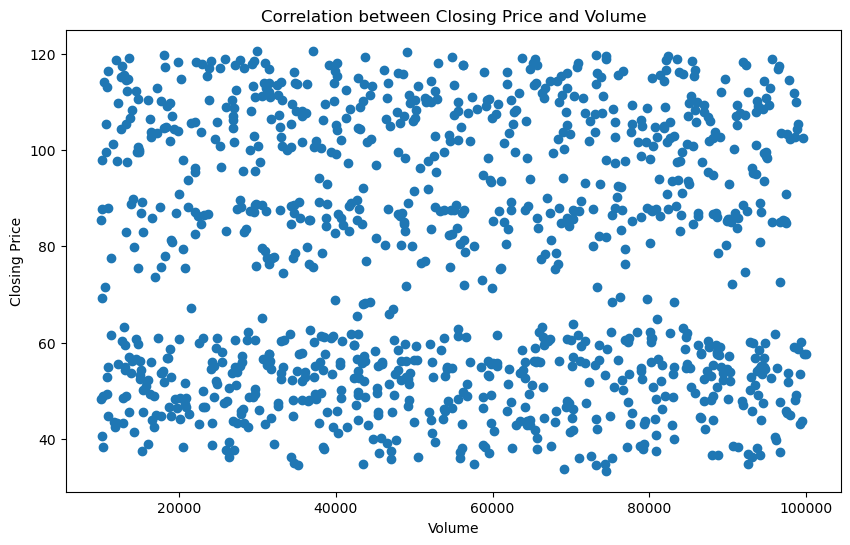

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(x="Volume" ,y="ClosingPrice",data=df)
plt.title("Correlation between Closing Price and Volume")
plt.ylabel("Closing Price")
plt.xlabel("Volume")
plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df["ClosingPrice"].dropna())


In [72]:
print(f"ADF Statistcs:{result[0]}")
print(f"p-value:{result[1]}")

ADF Statistcs:-0.6310168352540206
p-value:0.8638183590794384


In [73]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df["ClosingPrice"] , order=(5,1,0))
arima_model=model.fit()

forecast=arima_model.forecast(steps=30)

print(forecast)

2023-01-01    52.856611
2023-01-02    52.996060
2023-01-03    52.897440
2023-01-04    52.877377
2023-01-05    52.879688
2023-01-06    52.867785
2023-01-07    52.870028
2023-01-08    52.872331
2023-01-09    52.872025
2023-01-10    52.872682
2023-01-11    52.872818
2023-01-12    52.872667
2023-01-13    52.872678
2023-01-14    52.872654
2023-01-15    52.872633
2023-01-16    52.872639
2023-01-17    52.872639
2023-01-18    52.872640
2023-01-19    52.872641
2023-01-20    52.872641
2023-01-21    52.872641
2023-01-22    52.872641
2023-01-23    52.872641
2023-01-24    52.872641
2023-01-25    52.872641
2023-01-26    52.872641
2023-01-27    52.872641
2023-01-28    52.872641
2023-01-29    52.872641
2023-01-30    52.872641
Freq: D, Name: predicted_mean, dtype: float64


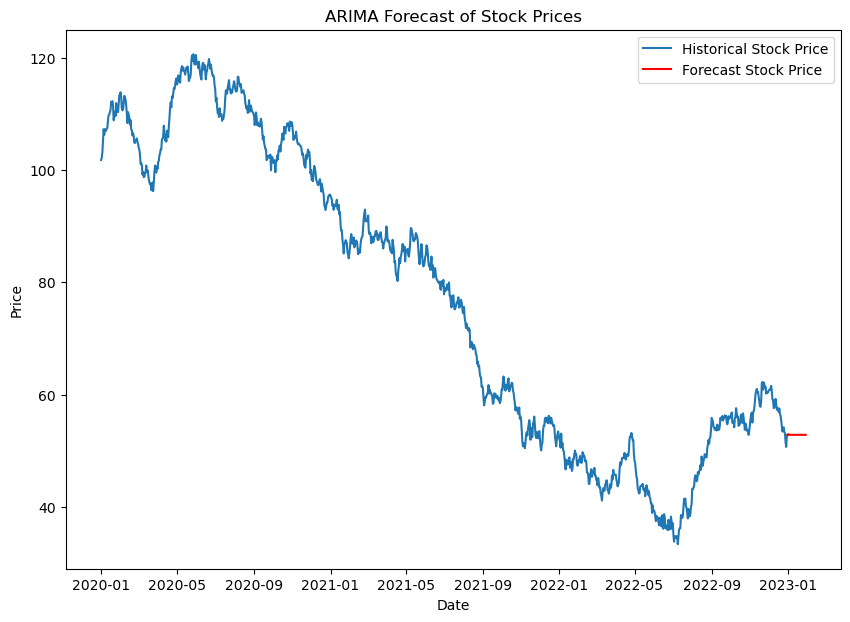

In [76]:
plt.figure(figsize=(10,7))
plt.plot(df.index , df["ClosingPrice"] , label="Historical Stock Price")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D") , forecast , label="Forecast Stock Price" , color="red")
plt.title("ARIMA Forecast of Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()